In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample

### Different connectivity information captured by the phase lag index (PLI) , weighted phase lag index (wPLI) , and directed phase lag index (dPLI) on simulated data

In [3]:
fs = 250  # sampling rate (Hz)
n_e = 300  # number of epochs
T = 10  # length of epochs (s)
f = 10  # frequency of sinusoids (Hz)
t = np.arange(0, T, 1 / fs)
A = 1  # noise amplitude
sigma = 0.5  # Gaussian noise variance

data = []

phase_differences = [0, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
for ps in zip(phase_differences):
    sig = []
    for _ in range(n_e):
        sig.append(np.sin(2 * np.pi * f * t - ps) +
                   A * np.random.normal(0, sigma, size=t.shape))
    data.append(sig)

data = np.swapaxes(np.array(data), 0, 1)  # make epochs the first dimension

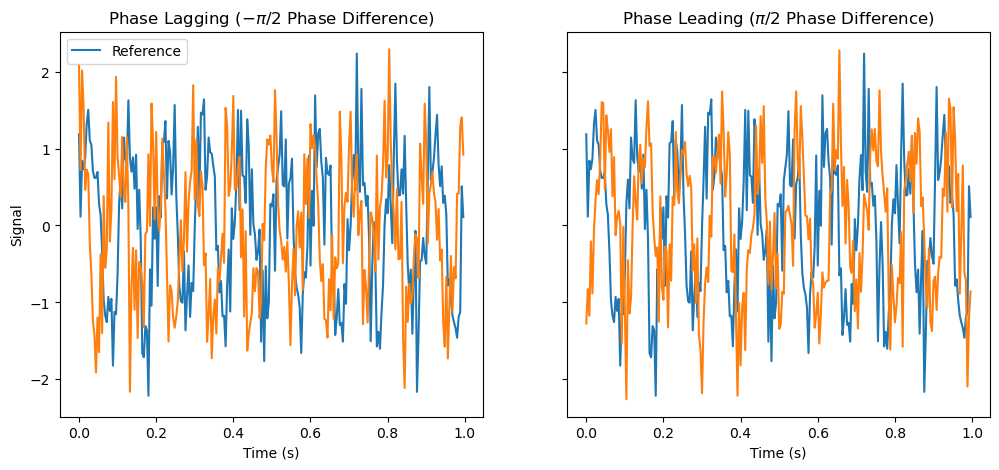

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[0].plot(t[:fs], data[0, 2, :fs])

ax[0].set_title(r"Phase Lagging ($-\pi/2$ Phase Difference)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[1].plot(t[:fs], data[0, 4, :fs])
ax[1].set_title(r"Phase Leading ($\pi/2$ Phase Difference)")
ax[1].set_xlabel("Time (s)")

plt.show()

In [4]:
conn = []
indices = ([0, 0, 0, 0, 0], [1, 2, 3, 4, 5])
for method in ['coh', 'cohy', 'imcoh', 'plv', 'ciplv', 'ppc', 'pli', 'dpli', 'wpli', 'wpli2_debiased']:
    conn.append(
        spectral_connectivity_epochs(
            data, method=method, sfreq=fs, indices=indices,
            fmin=9, fmax=11, faverage=True).get_data()[:, 0])
conn = np.array(conn)

Connectivity computation...
    computing connectivity for 5 connections
    using t=0.000s..9.996s for estimation (2500 points)
    frequencies: 9.0Hz..11.0Hz (21 points)
    connectivity scores will be averaged for each band


    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing 

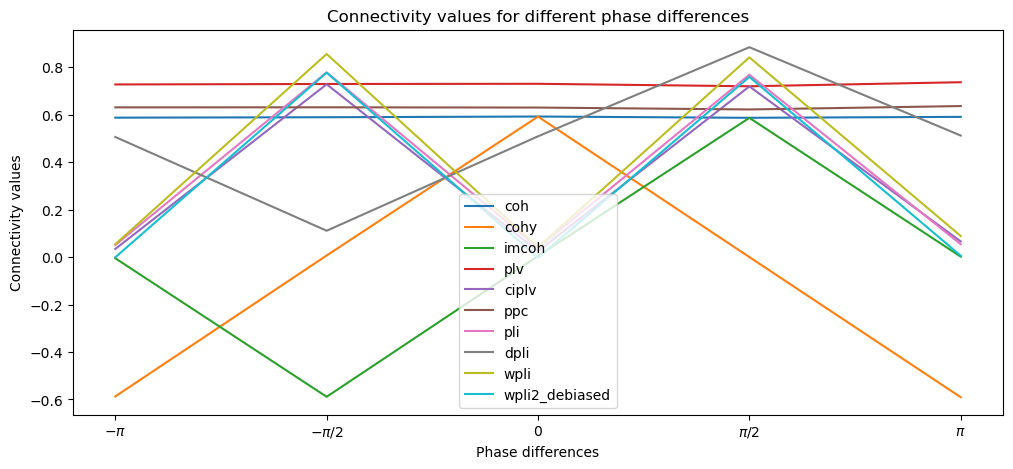

In [18]:
#Making a plot of the connectivity values, where the x axis represents the 
#different Phase differences and the y axis represents the different connectivity measures.
#Using a line for every measure, in the same plot 
#(i.e. 10 lines, one for each measure), plot the connectivity values for the
#different phase differences. The x axis should be the phase differences,
#and the y axis should be the connectivity values.
x = np.arange(5)

fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True)
ax.plot(x, conn[ 0], label="coh")
ax.plot(x, conn[ 1], label="cohy")
ax.plot(x, conn[ 2], label="imcoh")
ax.plot(x, conn[ 3], label="plv")
ax.plot(x, conn[ 4], label="ciplv")
ax.plot(x, conn[ 5], label="ppc")
ax.plot(x, conn[ 6], label="pli")
ax.plot(x, conn[ 7], label="dpli")
ax.plot(x, conn[ 8], label="wpli")
ax.plot(x, conn[ 9], label="wpli2_debiased")
ax.set_title(r"Connectivity values for different phase differences")

ax.set_xlabel("Phase differences")
ax.set_ylabel("Connectivity values")
#Chaging the x axis to show the phase differences
ax.set_xticks(x)
ax.set_xticklabels([ r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])

ax.legend()

plt.show()


Robustness to Outliers and Noise with wPLI

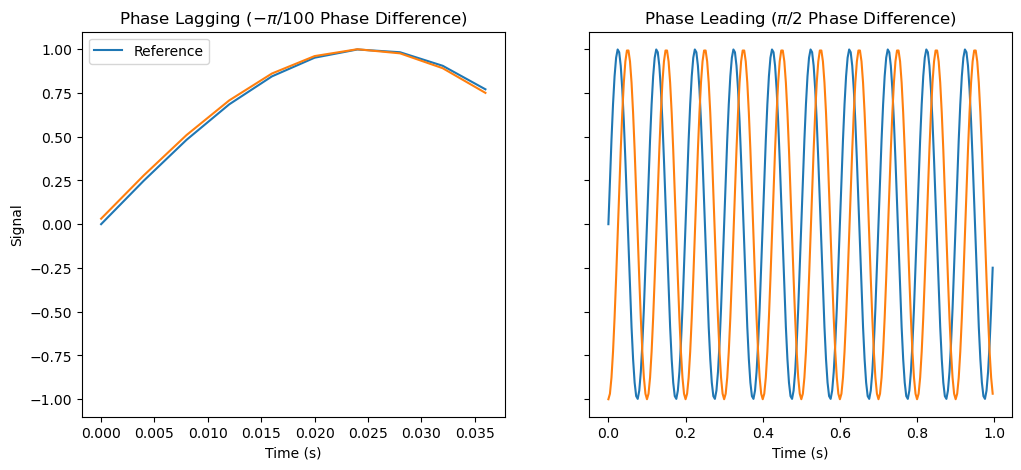

In [7]:
n_noise = 41  # amount of noise amplitude samples in [0, 4]
data = [[]]

# Generate reference
for _ in range(n_e):
    data[0].append(np.sin(2 * np.pi * f * t))

A_list = np.linspace(0, 10, n_noise)

for A in A_list:
    sig = []
    # Generate other signal
    for _ in range(int(n_e / 2)):  # phase difference -pi/100
        sig.append(np.sin(2 * np.pi * f * t + np.pi /
                   100 + A * np.random.uniform(-1, 1)))
    for _ in range(int(n_e / 2), n_e):  # phase difference pi/2
        sig.append(np.sin(2 * np.pi * f * t - np.pi /
                   2 + A * np.random.uniform(-1, 1)))
    data.append(sig)

data = np.swapaxes(np.array(data), 0, 1)

# Visualize the data
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].plot(t[:10], data[0, 0, :10], label="Reference")
ax[0].plot(t[:10], data[1, 1, :10])

ax[0].set_title(r"Phase Lagging ($-\pi/100$ Phase Difference)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[1].plot(t[:fs], data[-1, 1, :fs])
ax[1].set_title(r"Phase Leading ($\pi/2$ Phase Difference)")
ax[1].set_xlabel("Time (s)")

plt.show()

In [8]:
conn = []
indices = ([0] * n_noise, np.arange(1, n_noise + 1))
for method in ['pli', 'wpli']:
    conn.append(
        spectral_connectivity_epochs(
            data, method=method, sfreq=fs, indices=indices,
            fmin=9, fmax=11, faverage=True).get_data()[:, 0])
conn = np.array(conn)

Connectivity computation...
    computing connectivity for 41 connections
    using t=0.000s..9.996s for estimation (2500 points)
    frequencies: 9.0Hz..11.0Hz (21 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for e

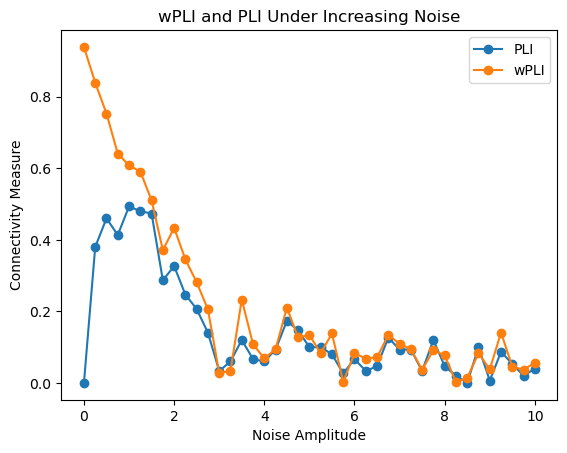

In [9]:
plt.figure()
plt.plot(A_list, conn[0], "o-", label="PLI")
plt.plot(A_list, conn[1], "o-", label="wPLI")
plt.legend()
plt.xlabel("Noise Amplitude")
plt.ylabel("Connectivity Measure")
plt.title("wPLI and PLI Under Increasing Noise")
plt.show()

## Demo on MEG DATA

In [10]:
data_path = sample.data_path()
raw_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
raw = mne.io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)


# Select gradiometers
picks = mne.pick_types(raw.info, meg='grad', eeg=False, stim=False, eog=True,
                       exclude='bads')

# Create epochs
event_id, tmin, tmax = 3, -0.2, 1.5  # need a long enough epoch for 5 cycles
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=dict(grad=4000e-13, eog=150e-6))
epochs.load_data().pick_types(meg='grad')  # just keep MEG and no EOG now

fmin, fmax = 4., 9.  # compute connectivity within 4-9 Hz
sfreq = raw.info['sfreq']  # the sampling frequency
tmin = 0.0  # exclude the baseline period

# Compute PLI, wPLI, and dPLI
con_pli = spectral_connectivity_epochs(
    epochs, method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin,
    fmax=fmax, faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

con_wpli = spectral_connectivity_epochs(
    epochs, method='wpli', mode='multitaper', sfreq=sfreq, fmin=fmin,
    fmax=fmax, faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

con_dpli = spectral_connectivity_epochs(
    epochs, method='dpli', mode='multitaper', sfreq=sfreq, fmin=fmin,
    fmax=fmax, faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

Opening raw data file /home/paosoriom/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Not setting metadata
73 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
4 projection items activated
Loading data for 73 events and 256 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based 

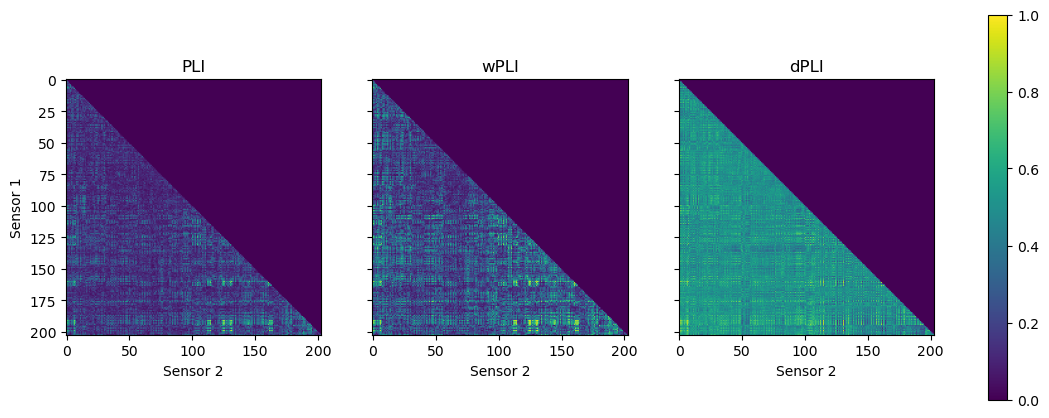

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
axs[0].imshow(con_pli.get_data('dense'), vmin=0, vmax=1)
axs[0].set_title("PLI")
axs[0].set_ylabel("Sensor 1")
axs[0].set_xlabel("Sensor 2")

axs[1].imshow(con_wpli.get_data('dense'), vmin=0, vmax=1)
axs[1].set_title("wPLI")
axs[1].set_xlabel("Sensor 2")

im = axs[2].imshow(con_dpli.get_data('dense'), vmin=0, vmax=1)
axs[2].set_title("dPLI")
axs[2].set_xlabel("Sensor 2")

fig.colorbar(im, ax=axs.ravel())
plt.show()

### Exploring and processing RAW MEG

Using matplotlib as 2D backend.


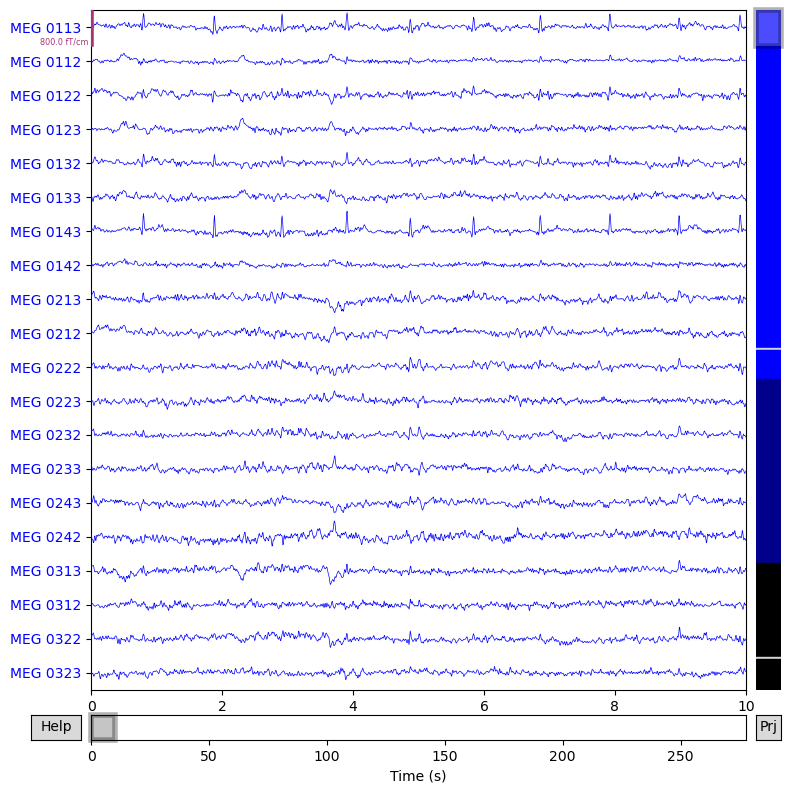

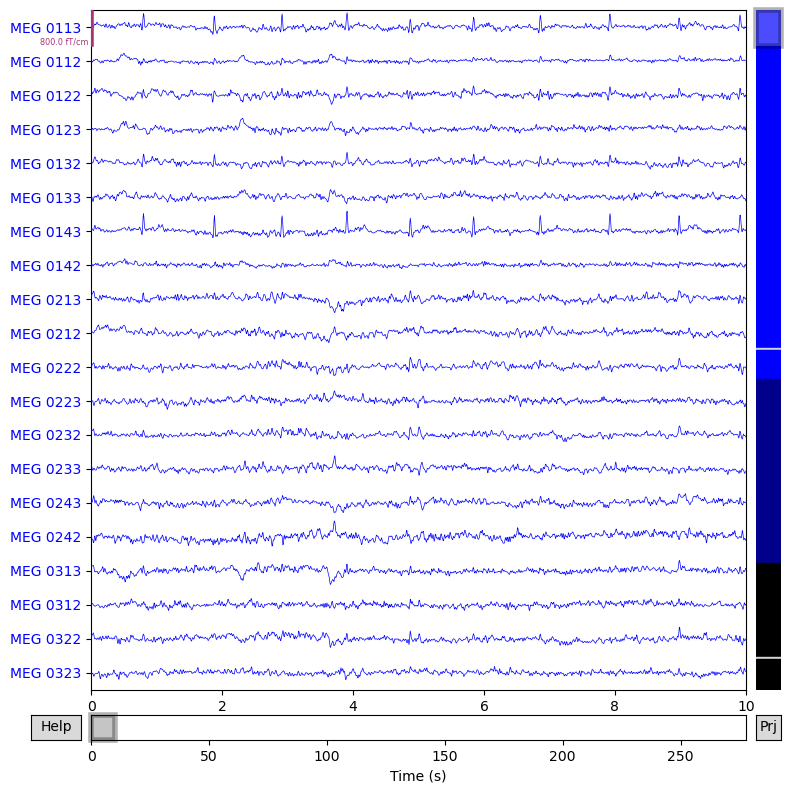

In [30]:
raw.plot()

In [38]:
raw.info['bads']

['MEG 2443', 'EEG 053']

Effective window size : 13.639 (s)


/home/paosoriom/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


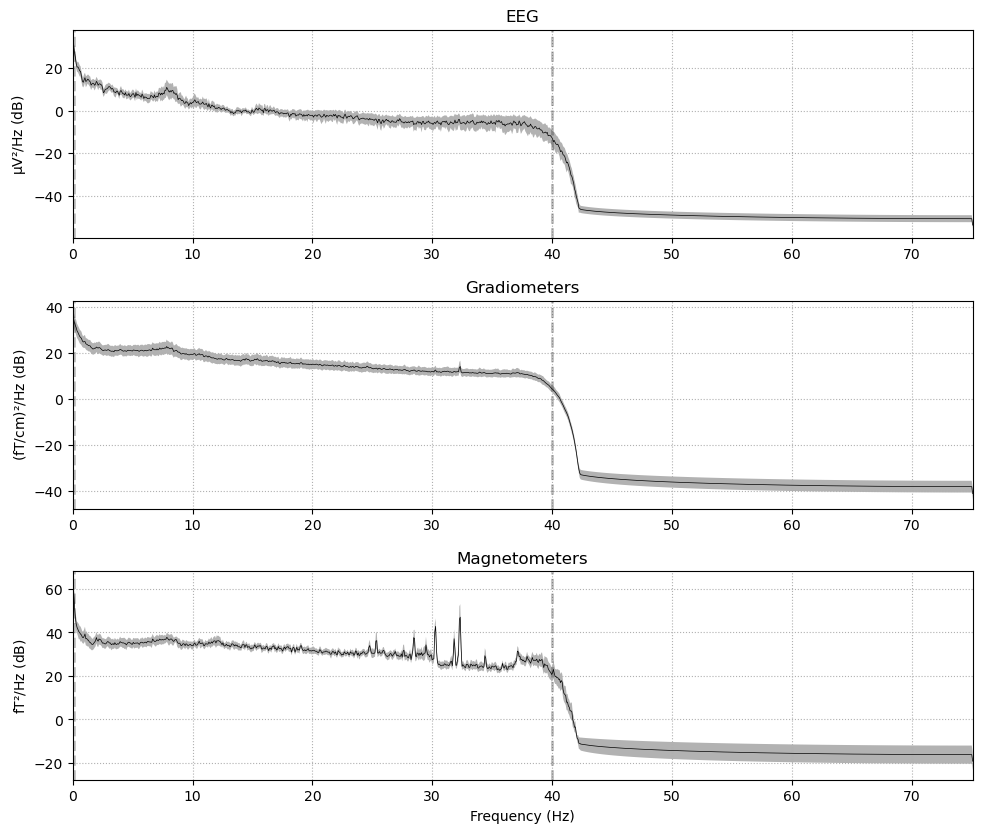

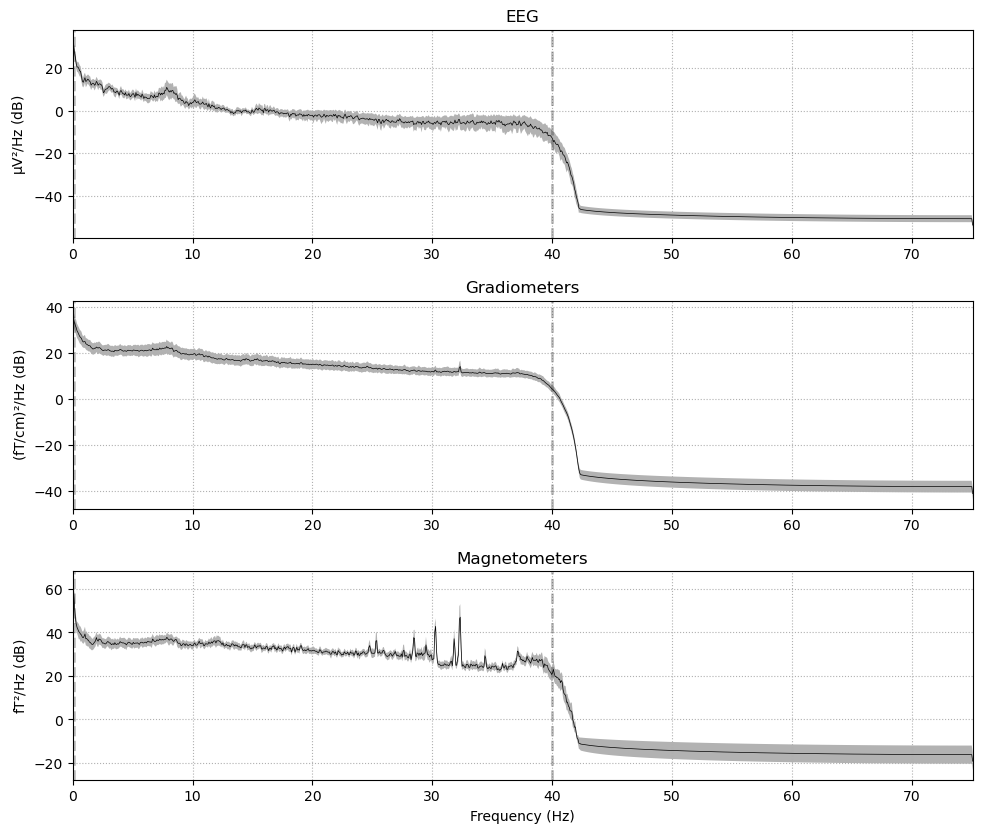

In [40]:
spectrum= raw.compute_psd()
spectrum.plot(average=True, picks='data', exclude='bads')

/tmp/ipykernel_303/572441889.py:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(tmin=0., tmax=60., fmin=2, fmax=40, n_fft=1024,
/home/paosoriom/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


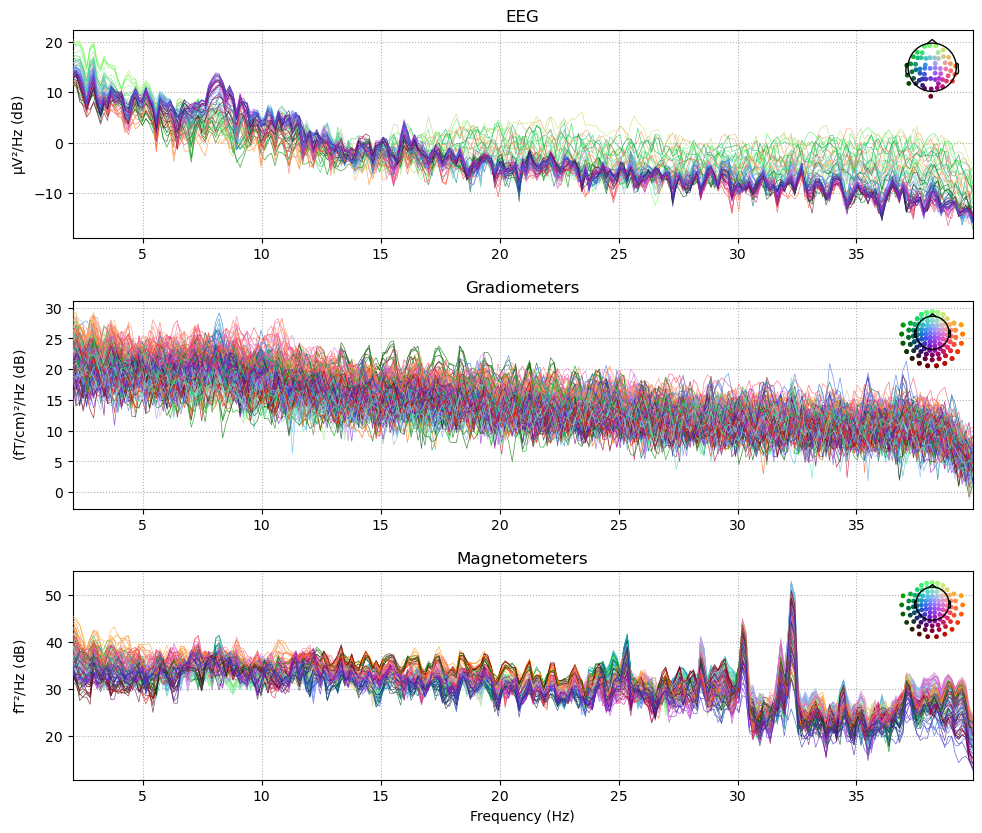

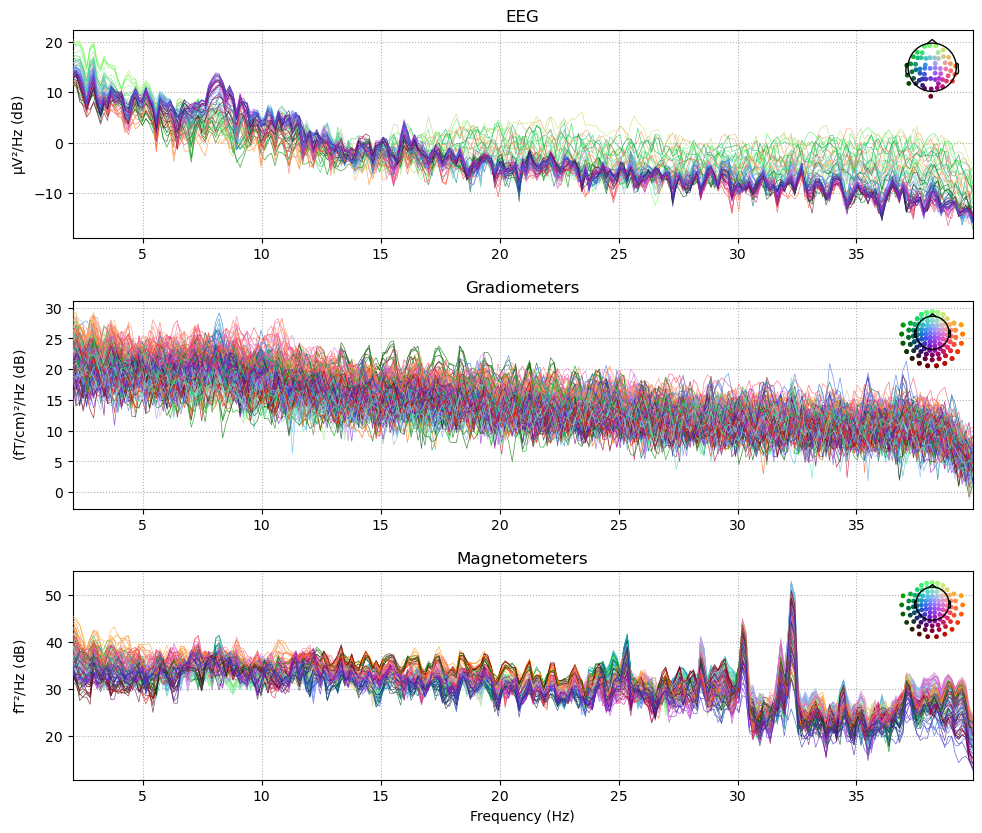

In [29]:
raw.compute_psd(tmin=0., tmax=60., fmin=2, fmax=40, n_fft=1024,
                    n_jobs=1, verbose='ERROR') .plot() # compute PSDs for plotting

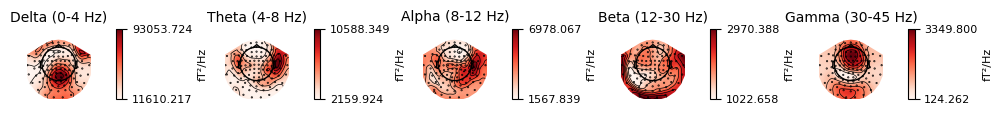

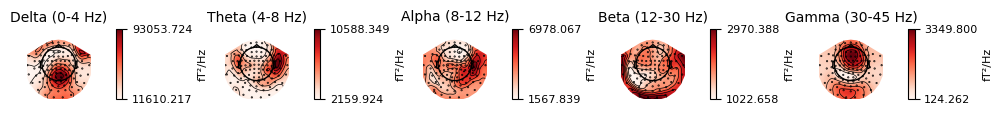

In [41]:
spectrum.plot_topomap()

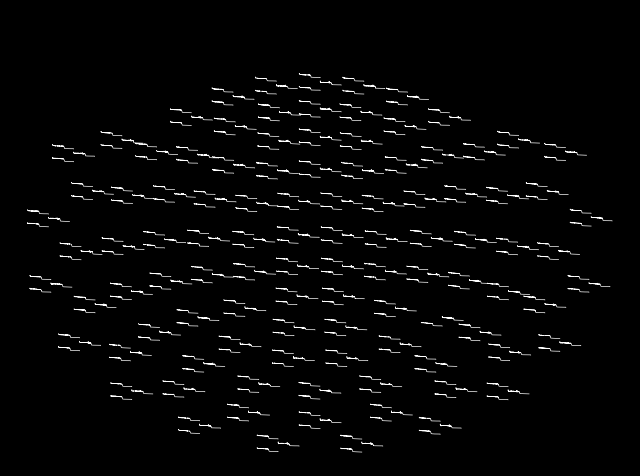

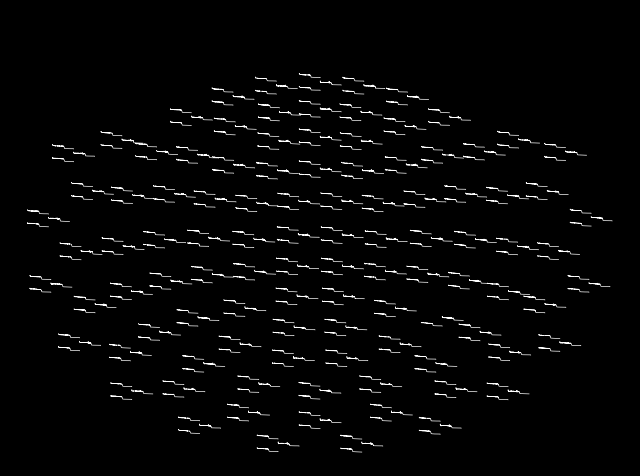

In [42]:
spectrum.plot_topo()

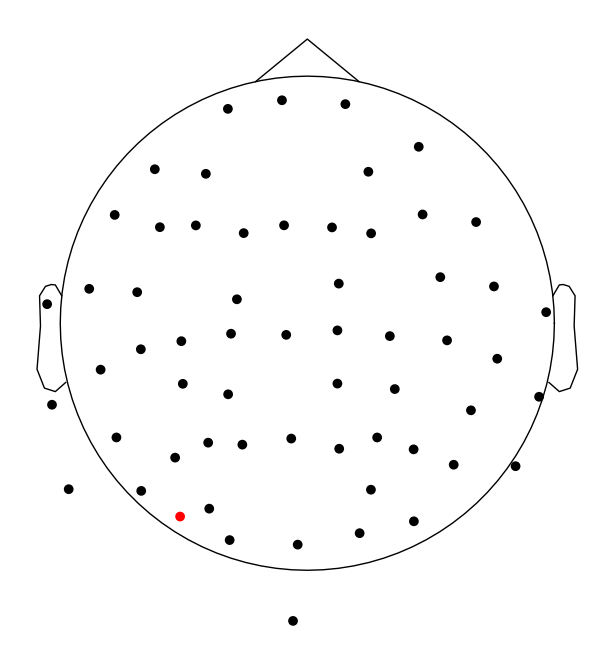

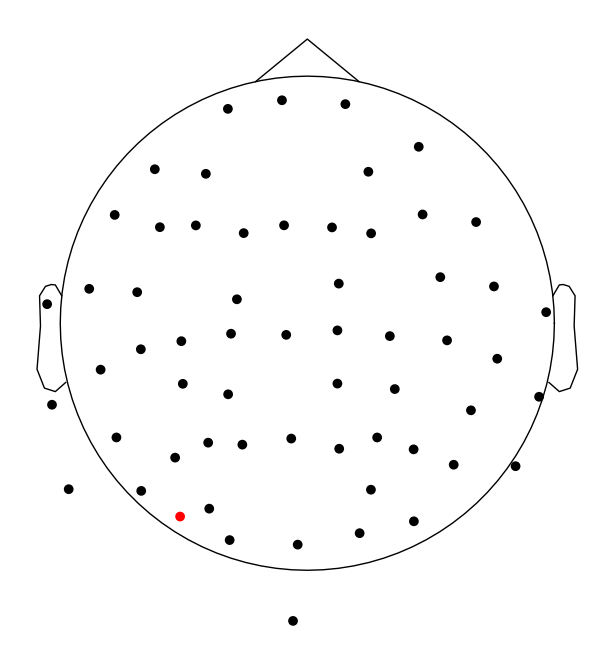

In [43]:
raw.plot_sensors(ch_type='eeg')

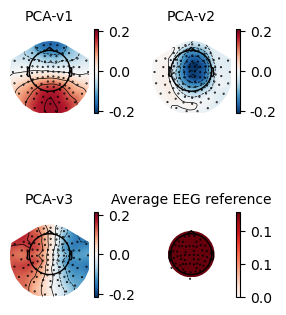

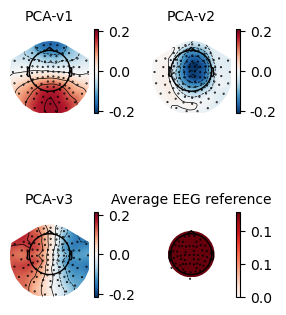

In [44]:
raw.plot_projs_topomap(colorbar=True, vlim='joint')